In [1]:
import numpy as np
import tensorflow as tf

In [6]:
# 1. Create a regression dataset
X = np.arange(0, 1000, 5)
y = np.arange(-500, 500, 5)
X, y

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
        845, 850, 855, 860, 865, 870, 875, 880, 885

In [9]:
# Split data into train and test sets
X_train = X[:160] # first 40 examples (80% of data)
y_train = y[:160]

X_test = X[160:] # last 10 examples (20% of data)
y_test = y[160:]

len(X_train), len(X_test)

(160, 40)

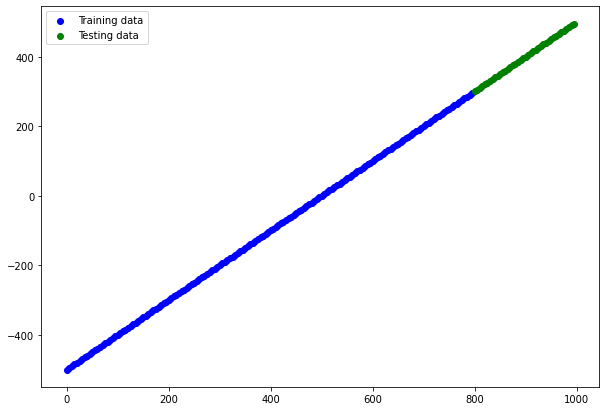

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [19]:
# 2. Build a neural network with 1 Dense layers and fitting it to the dataset
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 254.0821 - mae: 254.0821
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 252.1070 - mae: 252.1070
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 250.1018 - mae: 250.1018
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 248.1396 - mae: 248.1396
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 246.3764 - mae: 246.3764
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 244.5721 - mae: 244.5721
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 242.8990 - mae: 242.8990
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 241.2710 - mae: 241.2710
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 239.7129 - mae: 239.7129
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 238.2150 - mae: 238.2150
Epoch 11/200
5/5 [=====================

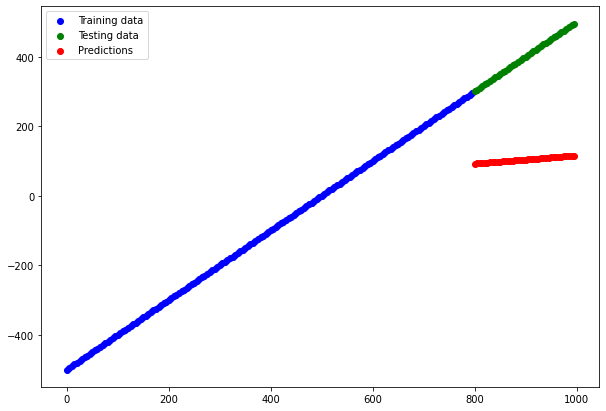

In [22]:
# 3. Try to improve the results 
y_preds = model_1.predict(X_test)
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 213.0598 - mae: 213.0598
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 212.9756 - mae: 212.9756
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 212.9238 - mae: 212.9238
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 212.8355 - mae: 212.8355
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 212.7853 - mae: 212.7853
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 212.6838 - mae: 212.6838
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 212.6155 - mae: 212.6155
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 212.5235 - mae: 212.5235
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 212.4090 - mae: 212.4090
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 212.2907 - mae: 212.2907
Epoch 11/200
5/5 [=====================

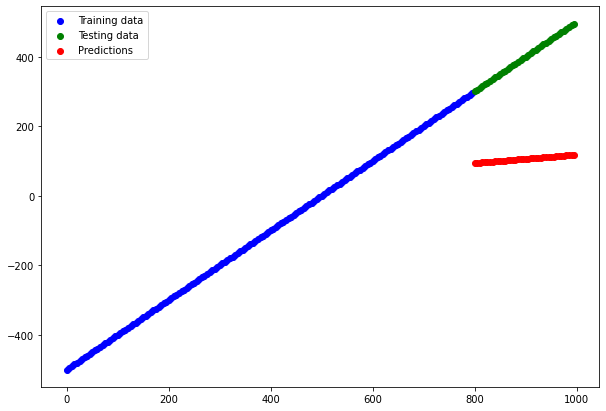

In [26]:
# 3.1 Build a larger model (4 dense layers)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_2.fit(X_train, y_train, epochs=200)
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 217.2929 - mae: 217.2929
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 208.3243 - mae: 208.3243
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 209.9735 - mae: 209.9735
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 209.3087 - mae: 209.3087
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 208.9912 - mae: 208.9912
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 207.9684 - mae: 207.9684
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 208.1404 - mae: 208.1404
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 208.0031 - mae: 208.0031
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 208.8083 - mae: 208.8083
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 208.0281 - mae: 208.0281
Epoch 11/200
5/5 [=====================

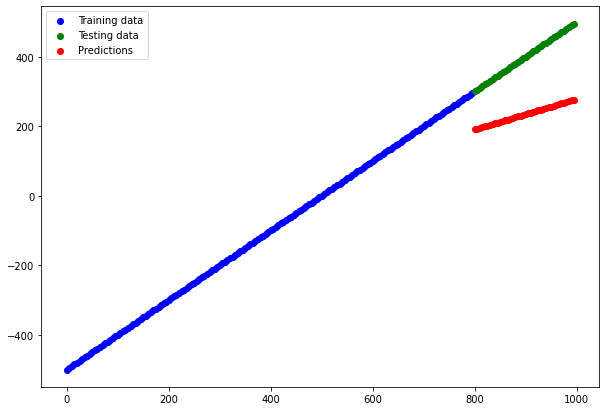

In [27]:
# 3.2 Increase the number of units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_3.fit(X_train, y_train, epochs=200)
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Epoch 1/200
5/5 [==============================] - 1s 7ms/step - loss: 212.7264 - mae: 212.7264
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 208.1086 - mae: 208.1086
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 209.0669 - mae: 209.0669
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 208.3740 - mae: 208.3740
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 208.6953 - mae: 208.6953
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 208.7362 - mae: 208.7362
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 208.0463 - mae: 208.0463
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 208.3022 - mae: 208.3022
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 208.2474 - mae: 208.2474
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 207.8689 - mae: 207.8689
Epoch 11/200
5/5 [=====================

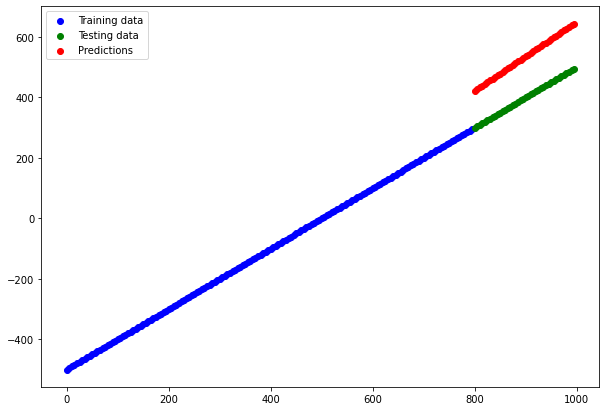

In [28]:
# 3.3 Lookup the doc of Adam and find out what the first paramemeter is, what happens if you increase it by 10x
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model_4.fit(X_train, y_train, epochs=200)
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

Epoch 1/300
5/5 [==============================] - 1s 5ms/step - loss: 218.4888 - mae: 218.4888
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 211.4850 - mae: 211.4850
Epoch 3/300
5/5 [==============================] - 0s 5ms/step - loss: 218.1154 - mae: 218.1154
Epoch 4/300
5/5 [==============================] - 0s 5ms/step - loss: 212.2431 - mae: 212.2431
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 207.9615 - mae: 207.9615
Epoch 6/300
5/5 [==============================] - 0s 7ms/step - loss: 207.9412 - mae: 207.9412
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 208.0703 - mae: 208.0703
Epoch 8/300
5/5 [==============================] - 0s 5ms/step - loss: 207.8382 - mae: 207.8382
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: 208.0200 - mae: 208.0200
Epoch 10/300
5/5 [==============================] - 0s 4ms/step - loss: 207.8013 - mae: 207.8013
Epoch 11/300
5/5 [=====================

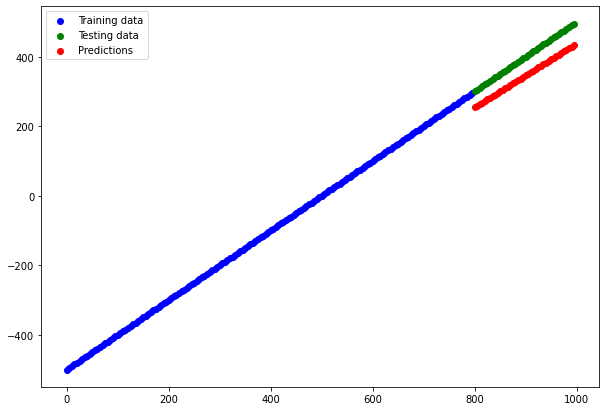

In [29]:
# 3.4 What happends if you train for longer (say 300 epochs instead of 200)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model_5.fit(X_train, y_train, epochs=300)
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [30]:
# Import the Boston pricing dataset from Tensorflow and model it
# Getting the boston datasets from tensorflow datasets 

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

65536/57026 [==================================] - 0s 0us/step


In [31]:
# Checkin the shape of our data 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [34]:
boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

boston_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history = boston_model.fit(X_train, y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 6ms/step - loss: 138.5562 - mae: 138.5562
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 28.5402 - mae: 28.5402
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 13.9244 - mae: 13.9244
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 7.8232 - mae: 7.8232
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 6.9763 - mae: 6.9763
Epoch 6/300
13/13 [==============================] - 0s 7ms/step - loss: 7.3596 - mae: 7.3596
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 6.3704 - mae: 6.3704
Epoch 8/300
13/13 [==============================] - 0s 7ms/step - loss: 6.3025 - mae: 6.3025
Epoch 9/300
13/13 [==============================] - 0s 6ms/step - loss: 6.7881 - mae: 6.7881
Epoch 10/300
13/13 [==============================] - 0s 6ms/step - loss: 6.2064 - mae: 6.2064
Epoch 11/300
13/13 [==============================]

In [35]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.0614 - mae: 4.0614


[4.0613884925842285, 4.0613884925842285]

Text(0.5, 0, 'epochs')

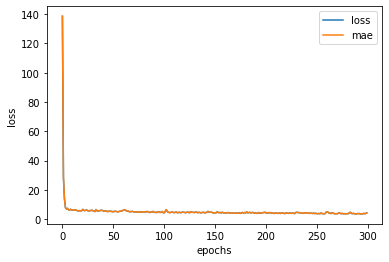

In [37]:
# Plotting the loss Vs Epoch 
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')